In [1]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [2]:
# Вычисляем частные производные по x и y  и составляем градиент:
from sympy.abc import x, y 
def f(x, y):
    return x**2 - x*y - 2*y**2
def grad_f(f, *var):
    return Matrix([f(*var).diff(variable) for variable in var]) 
display('Градиент в произвольной точке', grad_f(f, x, y))
def grad_f_point(f, var_dict):
    return grad_f(f, *var_dict.keys()).subs(var_dict)
grad1 = grad_f_point(f, {x: 1, y: 2}) 
display('Градиент в точке М (1,2)', grad1)
display('Производная в точке М с направлением 60 градусов', grad1.dot(Matrix((S(1)/2, (3**(S(1)/2)) / 2))))

'Градиент в произвольной точке'

Matrix([
[ 2*x - y],
[-x - 4*y]])

'Градиент в точке М (1,2)'

Matrix([
[ 0],
[-9]])

'Производная в точке М с направлением 60 градусов'

-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

2

2

'Уравнение касательной плоскости'

Eq(z - 1, 2*x + 2*y - 2)

'Уравнение нормали'

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

Eq(z, 2*x + 2*y - 1)

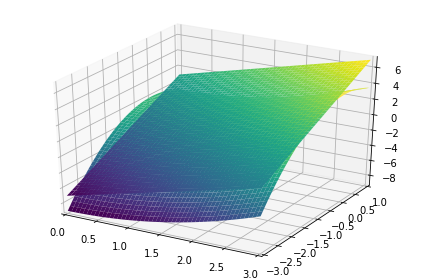

In [3]:
from sympy.abc import z
M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}
f = x**2 / 2 - y**2
fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]
display(fdx, fdy)
planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False),
(z - M.z)/(-1), evaluate=False) 
display('Уравнение касательной плоскости', planeM, 'Уравнение нормали', norm_line)

zz= solve(planeM, z)[0] 
display(sympy.Eq(z, zz))
plot3d(zz, f, (x, 0, 3), (y, -3, 1))

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [4]:
from sympy.abc import a
M = Point(0, a, a)
dictM = {x: M.x, y: M.y, z: M.z}
F = 3 * x * y * z - z**3 - a**3
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0) 
norm_line = sympy.Eq((x - M.x)/Fdx, (z - M.z)/Fdz, evaluate=False)
display('Уравнение касательной плоскости', planeM, 'Уравнение нормали', norm_line)
# так как Fdy == 0 => числитель == 0
display(sympy.Eq(y - M.y, 0)) 

3*a**2

0

-3*a**2

'Уравнение касательной плоскости'

Eq(3*a**2*x - 3*a**2*(-a + z), 0)

'Уравнение нормали'

Eq(x/(3*a**2), -(-a + z)/(3*a**2))

Eq(-a + y, 0)

### Индивидуальное задание.
Поверхность задана уравнением $x^2+y^2+z^2=2Rz$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=1$, $\alpha=\pi/6$.


#143 $x^{2}+6 x+y^{2}+z^{2}=0, \quad R=-3, \quad \alpha=0.42 \pi$

6 - 6*cos(21*pi/50)

-6*sin(21*pi/50)

-6

'Уравнение касательной плоскости'

Eq(-6*z + (6 - 6*cos(21*pi/50))*(x + 3*cos(21*pi/50)) - 6*(y + 3*sin(21*pi/50))*sin(21*pi/50) - 18, 0)

'Уравнение нормали'

Eq(Eq((x + 3*cos(21*pi/50))/(6 - 6*cos(21*pi/50)), -(y + 3*sin(21*pi/50))/(6*sin(21*pi/50))), -z/6 - 1/2)

-sqrt(-x**2 - 6*x - y**2)

sqrt(-x**2 - 6*x - y**2)

(6 - 6*cos(21*pi/50))*(x + 3*cos(21*pi/50))/6 - (y + 3*sin(21*pi/50))*sin(21*pi/50) - 3

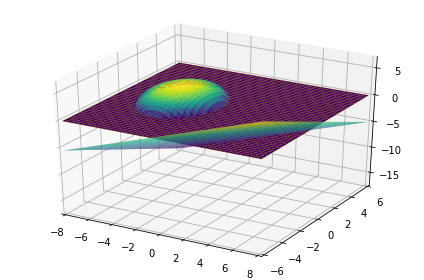

In [5]:
R = -3
a = (S(42) / 100) * sympy.pi
M = Point(R * Cos(a), R * Sin(a), R)
dictM = {x: M.x, y: M.y, z: M.z}
F = x**2 + 6*x + y**2 + z**2
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0) 
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False),
(z - M.z)/Fdz, evaluate=False)
display('Уравнение касательной плоскости', planeM, 'Уравнение нормали', norm_line)
zz1, zz2 = list(solve(F, z))
zz3 = M.z - 1/Fdz*(Fdx*(x - M.x) + Fdy*(y - M.y)) #это выразили z из уравнения касательной плоскости 
# Выражаем z
display(zz1, zz2, zz3)
plot3d(zz1, zz2, zz3, (x, -8, 8), (y, -6, 6))